# Neural network training - backpropagation

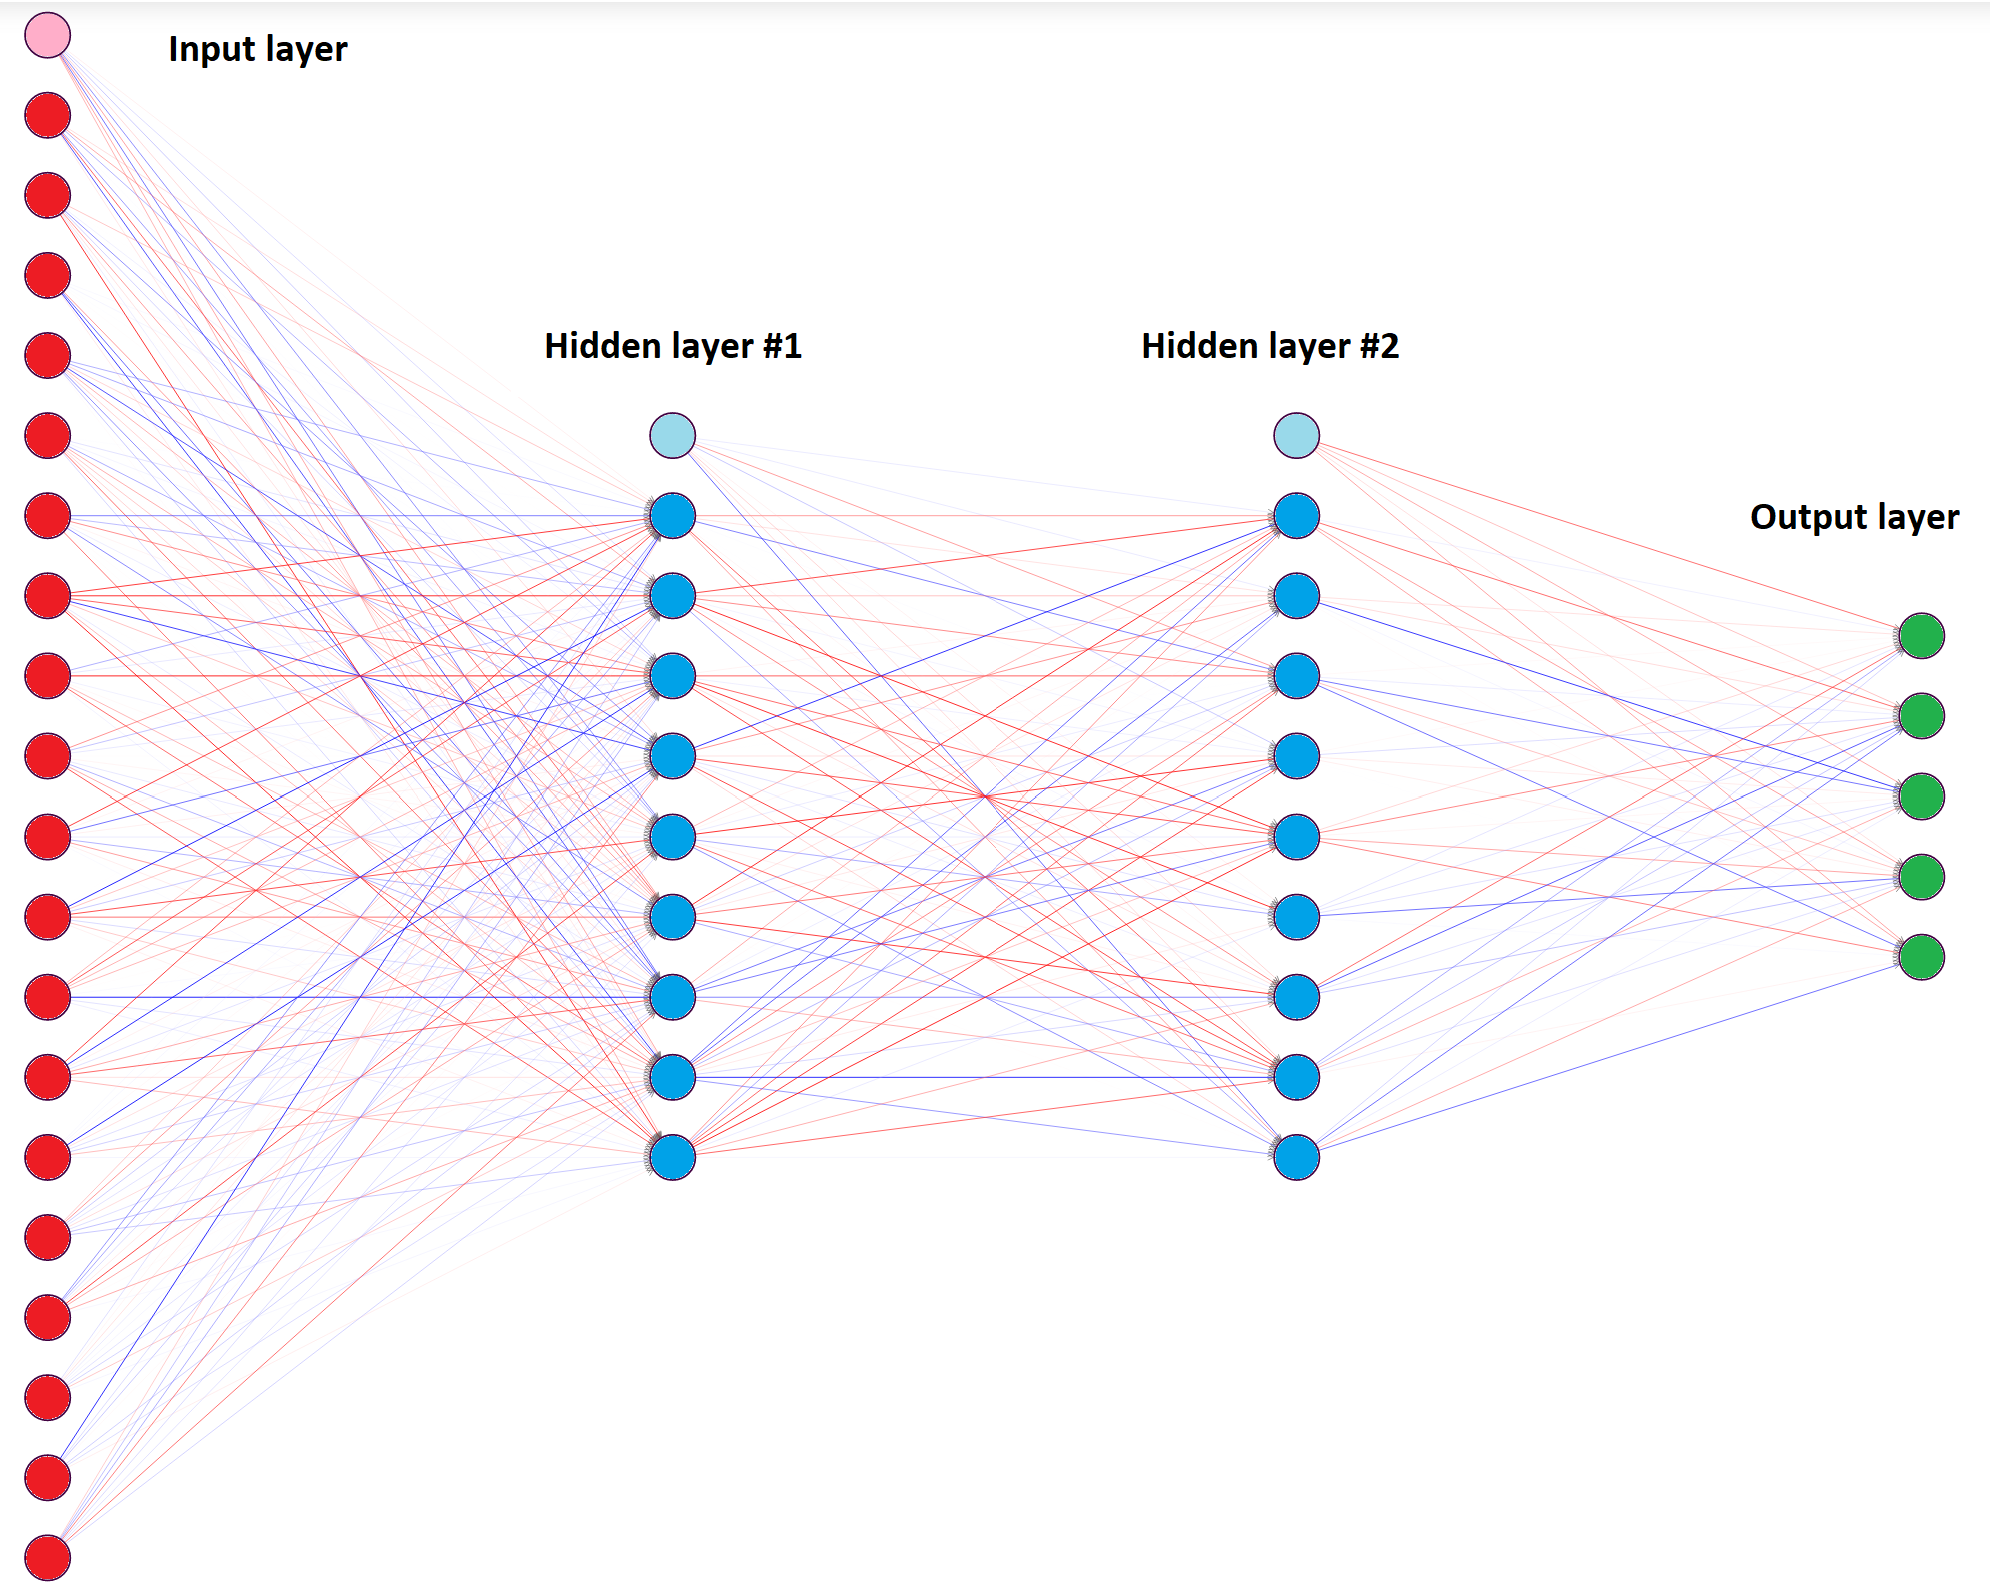

In [1]:
from IPython.display import Image
Image(filename='nn.png')

# Backpropagation algorithm

How can we optimize the weights in a general neural network? We need gradients, i.e. the partial derivatives with respect to all of the weights.

Let's try to understand the calculation with a simple example. We have a 2D binary classification problem with 1 hidden layer of $h$ neurons. We need two weight matrices: $W^{(1)}$ of size $3 \times h$ and $W^{(2)}$ of size $(h + 1) \times 1$
Forward propagation just consists of matrix-vector multiplications and applying the activation functions

$$
\begin{array}{lll}
\begin{array}{l}
x_0 = 1\\
x_1\\
x_2
\end{array}
&\hspace{0.3cm}
\begin{array}{l}
z^{(1)}_1 = W^{(1)}_{01} + W^{(1)}_{11}x_1 + W^{(1)}_{21}x_2\\
z^{(1)}_2 = W^{(1)}_{02} + W^{(1)}_{12}x_1 + W^{(1)}_{22}x_2\\
\vdots\\
z^{(1)}_h = W^{(1)}_{0h} + W^{(1)}_{1h}x_1 + W^{(1)}_{2h}x_2
\end{array}
&\hspace{0.3cm}
\begin{array}{l}
a^{(1)}_0 = 1\\
a^{(1)}_1 = \sigma\left(z^{(1)}_1\right) \\
a^{(1)}_2 = \sigma\left(z^{(1)}_2\right) \\
\vdots\\
a^{(1)}_h = \sigma\left(z^{(1)}_h\right)
\end{array}
& \hspace{0.3cm}
\begin{array}{l}
z^{(2)}_1 = W^{(2)}_{01} + W^{(2)}_{11}a^{(1)}_1 + W^{(2)}_{21}a^{(1)}_2 + \cdots + W^{(2)}_{h1}a^{(1)}_h\\
\end{array}
& \hspace{0.3cm}
\begin{array}{l}
y_{pred} = a^{(2)}_1 =  \sigma\left(z^{(2)}_1\right)\\
\end{array}
\end{array}
$$

The contribution of a single sample to the log loss function:

$$L = -y_{true}\log(y_{pred})-(1-y_{true})\log(1-y_{pred})$$

We have to calculate the partial derivatives of $L$ with respect to the entries of $W^{(1)}$ and $W^{(2)}$. It is easier to start from backwards with the $W^{(2)}$ weights and apply the chain rule:

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(2)}_{i1}} + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(2)}_{i1}}  $$

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = -y_{true} \cdot \frac{1}{\sigma\left(z^{(2)}_1\right)} \cdot 
\sigma\left(z^{(2)}_1\right) \left(1-\sigma\left(z^{(2)}_1\right)\right) \cdot a^{(1)}_{i}
+ (1-y_{true}) \cdot \frac{1}{1- \sigma\left(z^{(2)}_1\right)} \cdot 
\sigma\left(z^{(2)}_1\right) \left(1-\sigma\left(z^{(2)}_1\right)\right)  \cdot a^{(1)}_{i}
$$

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = \left(y_{pred} - y_{true}\right) a^{(1)}_{i} = \delta^{(2)}_{1} a^{(1)}_{i}$$

Now we can get the derivatives w.r.t. the entries of  $W^{(1)}$ by using a massive amount of chain rules:


$$\frac{\partial L}{\partial W^{(1)}_{ij}} = -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(1)}_{ij}} + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(1)}_{ij}} = $$
$$
 -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) } {\partial z^{(1)}_j}\cdot
 \frac{\partial z^{(1)}_j}{\partial W^{(1)}_{ij}}
 + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial \sigma\left(z^{(2)}_1\right) }{\partial z^{(1)}_j}\cdot
 \frac{\partial z^{(1)}_j}{\partial W^{(1)}_{ij}} = 
$$
$$
= \left(y_{pred} - y_{true}\right) \cdot W^{(2)}_{j1}a^{(1)}_j \left(1-a^{(1)}_j\right) \cdot x_i
$$
$$\frac{\partial L}{\partial W^{(1)}_{ij}} = \delta^{(1)}_{j} \cdot x_i$$

Short summary:

- using a given set of weights we can use feedforward calculation to get the activations and outputs
- we calculate the $\delta^{(2)} = y_{pred} - y_{true}$ error on the output layer 
- we propagate the errors backwards to calculate other $\delta$ values
$$\delta^{(1)} = W^{(2)}\delta^{(2)} \cdot a^{(1)} \cdot \left(1 - a^{(1)}\right)$$
- from the deltas we can simply get the partial derivatives:
$$\frac{\partial L}{\partial W^{(1)}_{ij}} = \delta^{(1)}_{j} \cdot x_i = \textrm{(delta on the next layer)} \times \textrm{(activation on the previous layer)}$$
- then we have the gradient and can apply any gradient-based optimization method

## Try to code a neural network from scratch with 
- 2 input neurons 
- 1 hidden layer with 5 neurons
- 1 output neuron
- sigmoid activations


- Create functions that do the feedforward and backprogation phases, too
- Create a training that does a gradient descent algorithm based on the partial derivatives
- For validation we'll use the scikit-learn's `make_moons` function to create a nice 2D dataset

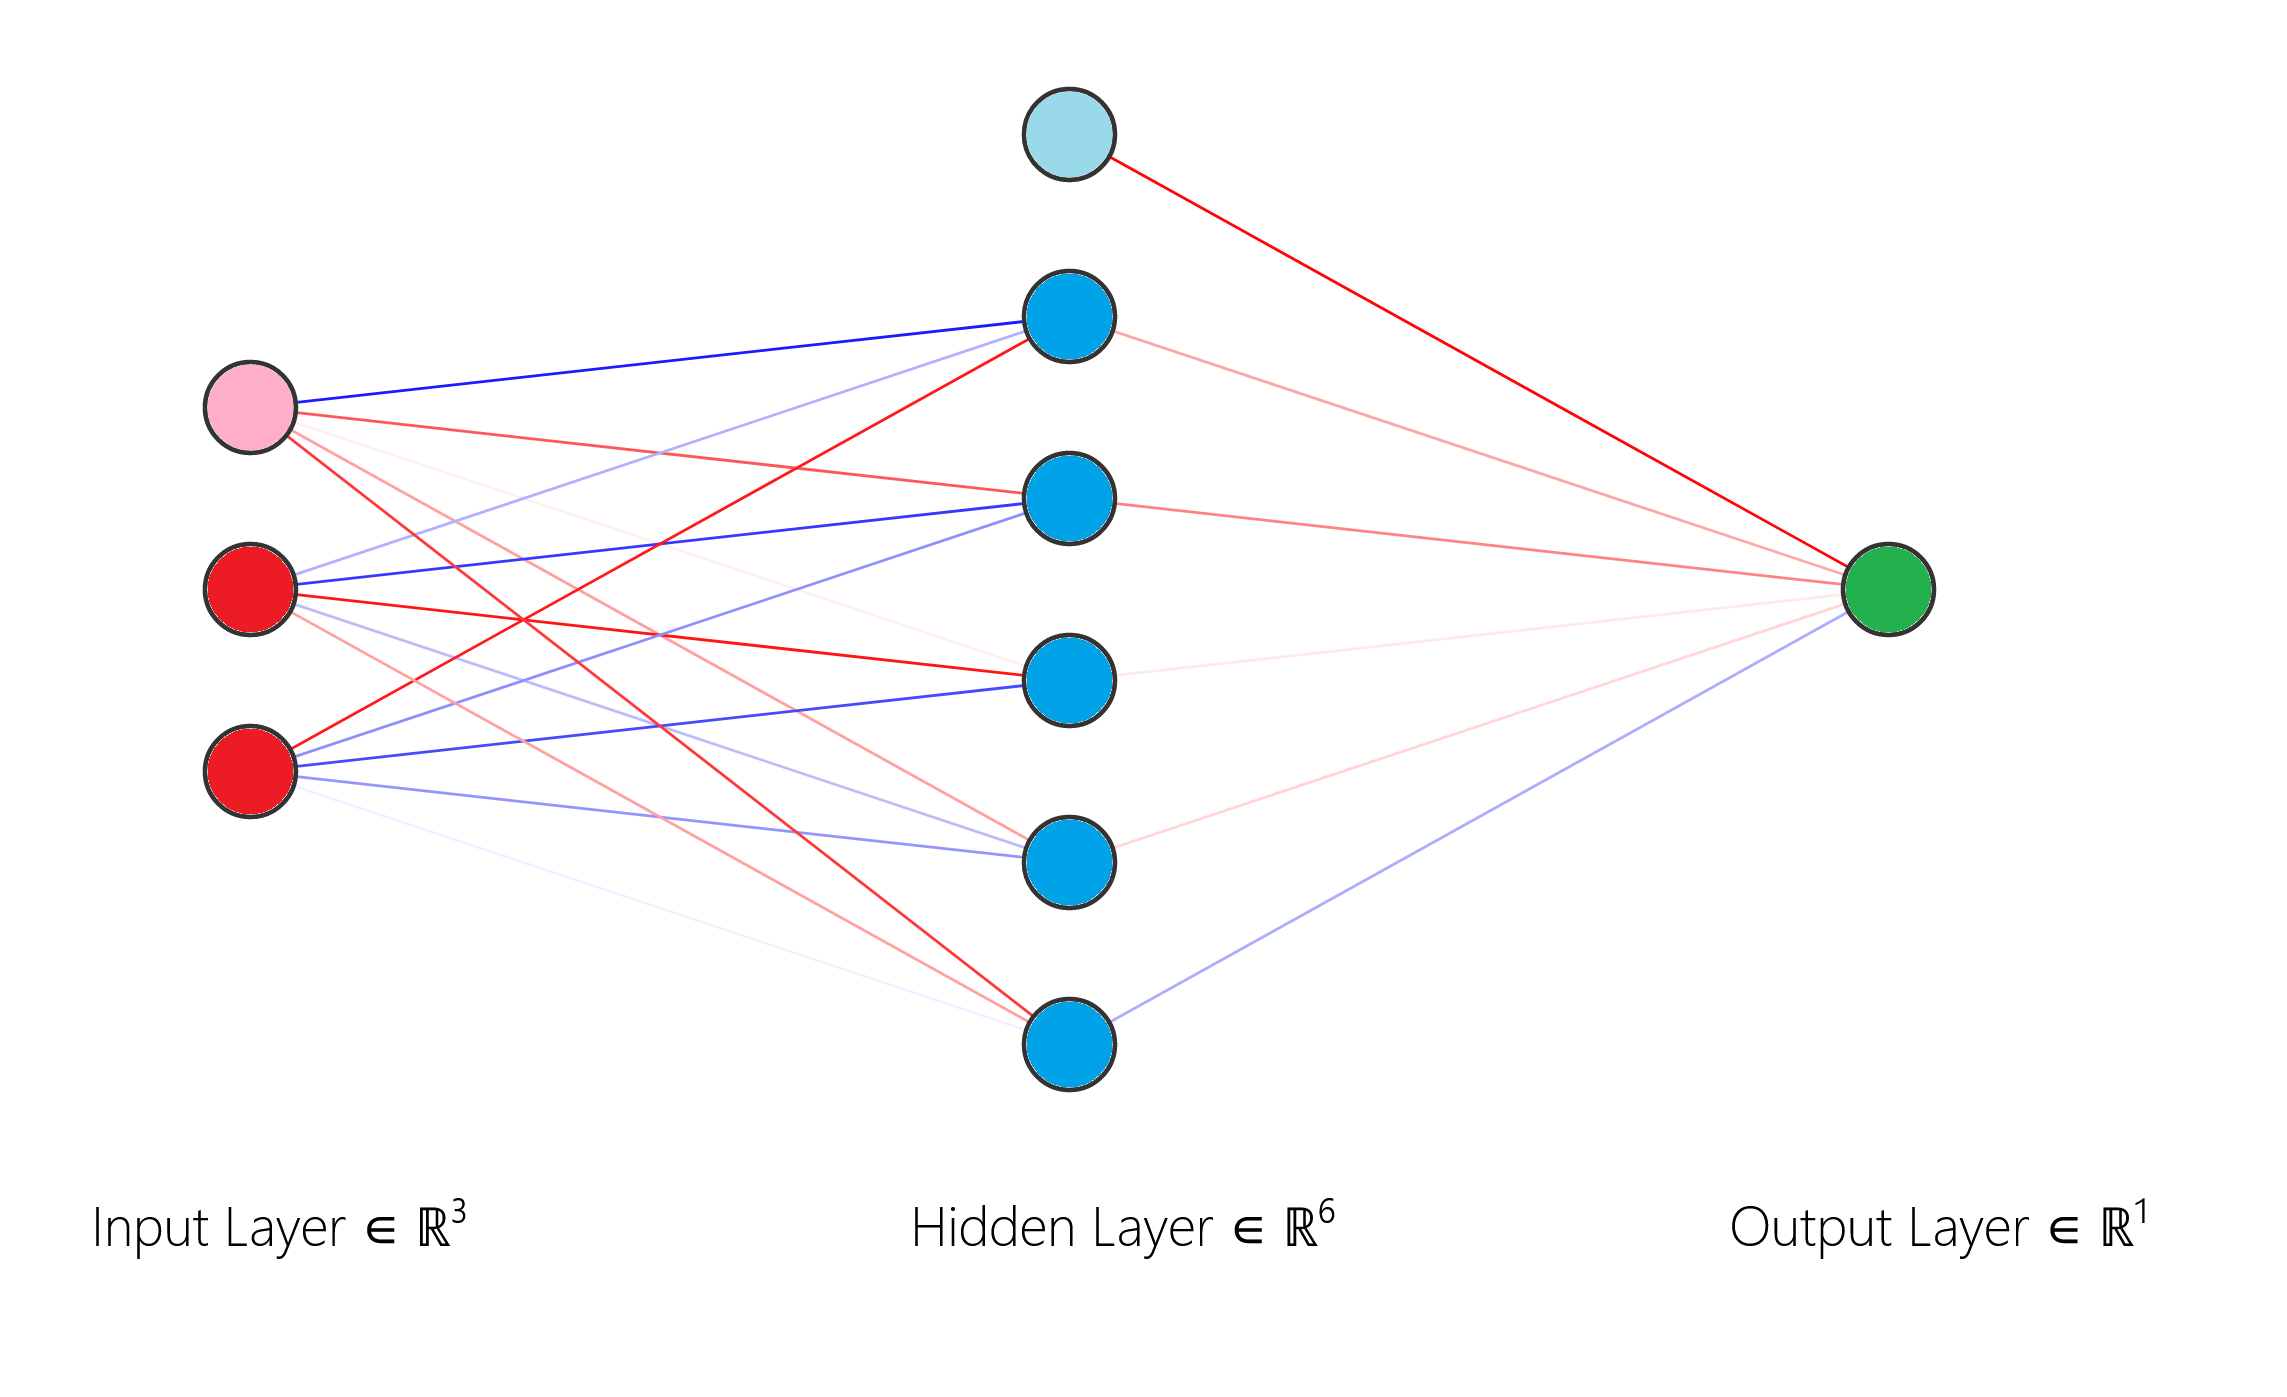

In [2]:
Image('nn_251.png')

In [45]:
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
from tqdm import tqdm

import pandas as pd
import numpy as np

%matplotlib inline


def sigmoid(z):

    return 1 / (1 + np.exp(-z))

def feedforward(X, W1, W2):

    num_samples = X.shape[0]
    
    ###############################
    X = np.hstack((np.ones((num_samples, 1)), X))
    
    z1 = X @ W1
    a1 = sigmoid(z1)
    ###############################
    
    a1 = np.hstack((np.ones((num_samples, 1)), a1))
    
    z2 = a1 @ W2
    a2 = sigmoid(z2)

    y_pred = a2
    
    return y_pred


def backprop(X, W1, W2, y_true):

    y_true = y_true.reshape(-1, 1)
    num_samples = X.shape[0]
    
    ###############################  Feedforward layer 1
    X = np.hstack((np.ones((num_samples, 1)), X))
    
    z1 = X @ W1
    a1 = sigmoid(z1)
    ############################### Feedforward layer 2
    
    a1 = np.hstack((np.ones((num_samples, 1)), a1))
    
    z2 = a1 @ W2
    a2 = sigmoid(z2)
    
    y_pred = a2
    
    ############################### Backpropagation layer 2
    
    delta2 = y_pred - y_true
    deriv2 = a1.T @ delta2
    
    ############################### Backpropagation layer 1

    delta1 = (delta2 @ W2.T) * a1 * (1 - a1)
    delta1 = delta1[:, 1:]  # the first column of delta1 is constant 0, we can drop it
    
    deriv1 = X.T @ delta1

    
    return deriv1, deriv2

In [46]:
# Check the shapes of the results

num_samples = 100
num_features = 2
num_hidden_neurons = 5

W1 = np.random.normal(size=(num_features + 1, num_hidden_neurons)) 
W2 = np.random.normal(size=(num_hidden_neurons + 1, 1)) 

X = np.random.normal(size=(num_samples, num_features)) 
y_true = np.random.normal(size=(num_samples, 1)) 

###############################  Feedforward layer 1
X = np.hstack((np.ones((num_samples, 1)), X))

z1 = X @ W1
a1 = sigmoid(z1)
############################### Feedforward layer 2

a1 = np.hstack((np.ones((num_samples, 1)), a1))

z2 = a1 @ W2
a2 = sigmoid(z2)

y_pred = a2

############################### Backpropagation layer 2

delta2 = y_pred - y_true
deriv2 = a1.T @ delta2

############################### Backpropagation layer 1
delta1 = (delta2 @ W2.T) * a1 * (1 - a1)
delta1 = delta1[:, 1:]  # the first column of delta1 is constant 0, we can drop it

deriv1 = X.T @ delta1


print(W1.shape, W2.shape, X.shape, z1.shape, a1.shape, z2.shape, a2.shape, delta2.shape, deriv2.shape)



(3, 5) (6, 1) (100, 3) (100, 5) (100, 6) (100, 1) (100, 1) (100, 1) (6, 1)


$$\delta^{(1)} = W^{(2)}\delta^{(2)} \cdot a^{(1)} \cdot \left(1 - a^{(1)}\right)$$


In [24]:
W2.shape, delta2.shape, a1.shape

((6, 1), (100, 1), (100, 6))

In [35]:
delta1 = (delta2 @ W2.T) * a1 * (1 - a1)
delta1 = delta1[:, 1:]  # the first column of delta1 is constant 0, we can drop it

deriv1 = X.T @ delta1

delta1.shape, X.shape, deriv1.shape

((100, 5), (100, 3), (3, 5))

In [49]:
W1 = np.random.normal(size=(num_features + 1, num_hidden_neurons)) 
W2 = np.random.normal(size=(num_hidden_neurons + 1, 1)) 

X = np.random.normal(size=(num_samples, num_features)) 
y_true = np.random.normal(size=(num_samples, 1)) 

feedforward(X, W1, W2).shape, backprop(X, W1, W2, y_true)

((100, 1),
 (array([[  7.74613756,   2.51758705, -18.93409175,  -7.89605125,
            6.8478727 ],
         [ -1.42071695,  -0.05079036,  -2.66297019,   0.63651906,
            0.91796941],
         [  2.39525093,  -1.05570954,   4.14734906,   3.97451521,
           -1.41098157]]),
  array([[40.3881318 ],
         [30.96576305],
         [15.81919662],
         [16.34024739],
         [ 9.95927399],
         [22.40601791]])))

### Create a train and test with `sklearn.datasets`' `make_moons` function
- 500 points for the train set
- 100 points for the test set

In [58]:
from sklearn.datasets import make_moons
import seaborn as sns

X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)
X_te, y_te = make_moons(100, random_state=43, noise=0.15)

X_tr.shape, y_tr.shape

((500, 2), (500,))

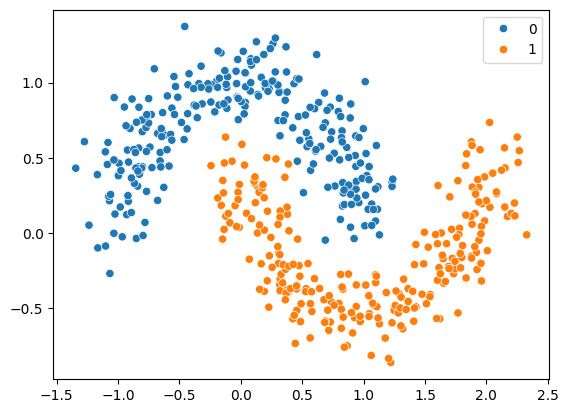

<Axes: >

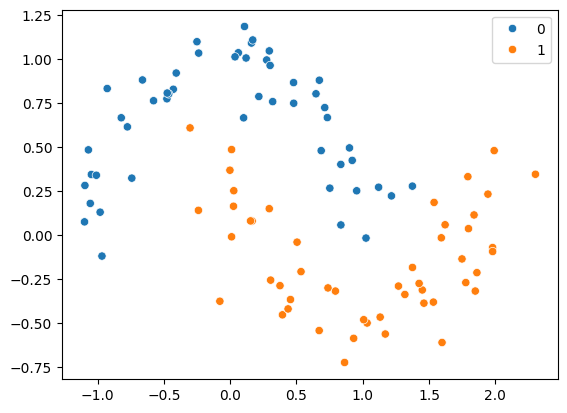

In [59]:
sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr)
plt.show()
sns.scatterplot(x=X_te[:, 0], y=X_te[:, 1], hue=y_te)

## Optimization: Gradient Descent algorithm

$$f(x, y) \to \min!$$

$$
\left.
\begin{array}[c]\\
\displaystyle x^{n+1} = x^{n} - \alpha \cdot \frac {\partial f}{\partial x}(x^n, y^n)\\
\displaystyle y^{n+1} = y^{n} - \alpha \cdot \frac {\partial f}{\partial y}(x^n, y^n)
\end{array}
\right\}$$

$$P^{n+1} = P^n - \alpha \cdot \nabla f(P)$$


In [125]:
def train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.001, n_hidden_neurons=5, num_epochs=100, random_state=42):

    num_features = X_tr.shape[1]

    rs = np.random.RandomState(random_state)
    
    W1 = rs.normal(size=(num_features + 1, n_hidden_neurons))
    W2 = rs.normal(size=(n_hidden_neurons + 1, 1))

    print(W1.shape, W2.shape)
    
    train_losses, test_losses = [], []
    
    for _ in tqdm(range(num_epochs)):
        
        gradient1, gradient2 = backprop(X_tr, W1, W2, y_tr)
        
        W1 = W1 - learning_rate * gradient1
        W2 = W2 - learning_rate * gradient2

        y_pred_tr = feedforward(X_tr, W1, W2)
        train_loss = log_loss(y_tr, y_pred_tr)
        train_losses.append(train_loss)

        y_pred_te = feedforward(X_te, W1, W2)
        test_loss = log_loss(y_te, y_pred_te)
        test_losses.append(test_loss)

    plt.plot(train_losses, "r-", label="Train loss")
    plt.plot(test_losses, "g-", label="Test loss")

    plt.title(f"Final test loss: {test_losses[-1]}")
    plt.legend()
    
    return train_losses, test_losses, W1, W2

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1109.89it/s]


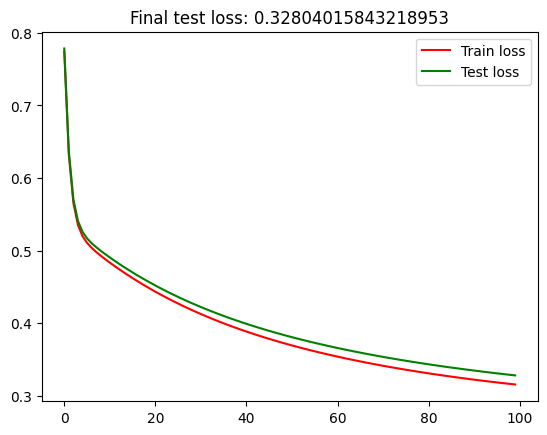

In [126]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.001, n_hidden_neurons=5, num_epochs=100);

In [7]:
## Experiment with different learning rates and neurons

(3, 5) (6, 1)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1748.02it/s]


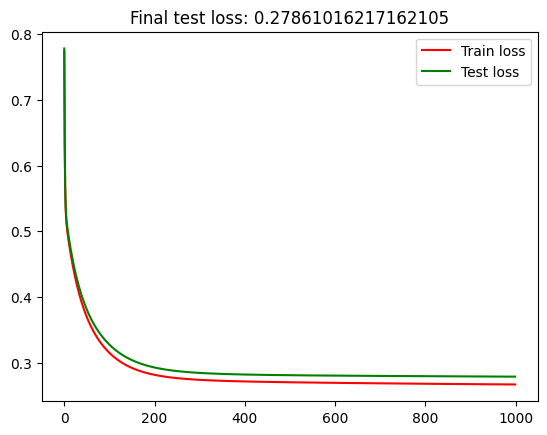

In [127]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.001, n_hidden_neurons=5, num_epochs=1000);

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1827.15it/s]


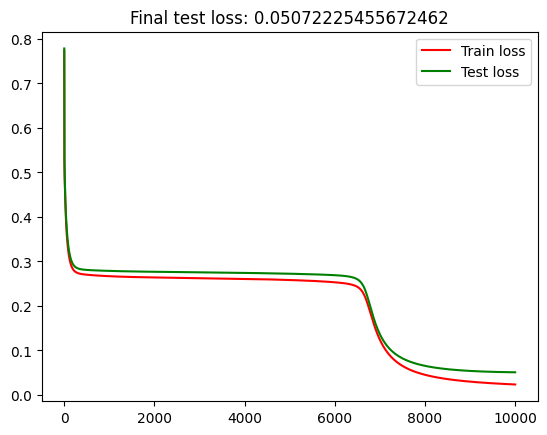

In [128]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.001, n_hidden_neurons=5, num_epochs=10000);

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1825.05it/s]


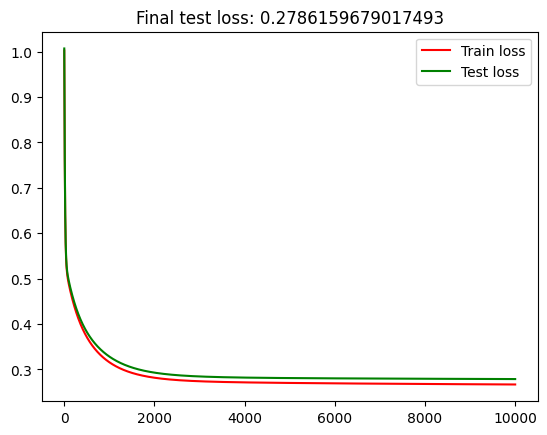

In [129]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.0001, n_hidden_neurons=5, num_epochs=10000);

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1840.77it/s]


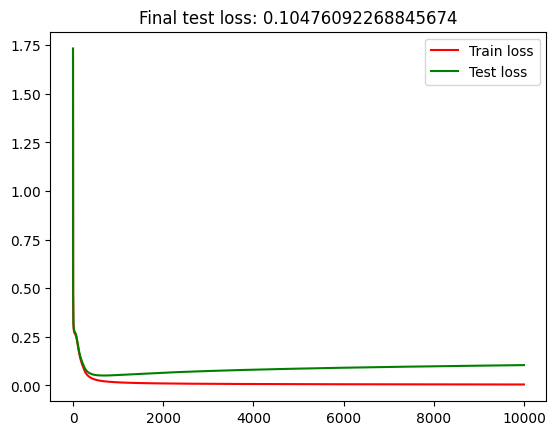

In [130]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.01, n_hidden_neurons=5, num_epochs=10000);

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1840.71it/s]


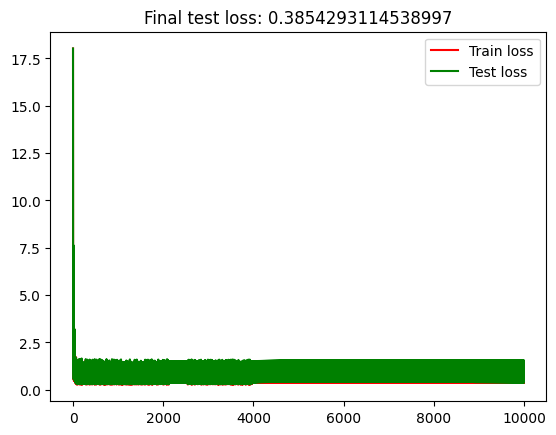

In [131]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=0.1, n_hidden_neurons=5, num_epochs=10000);

(3, 5) (6, 1)


  0%|                                                                                                                                                                                                                                                 | 0/10000 [00:00<?, ?it/s]/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_1713/138240781.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_1713/138240781.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_1713/138240781.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_1713/138240781.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_1713/138240781.py:14: RuntimeWarning: overflow en

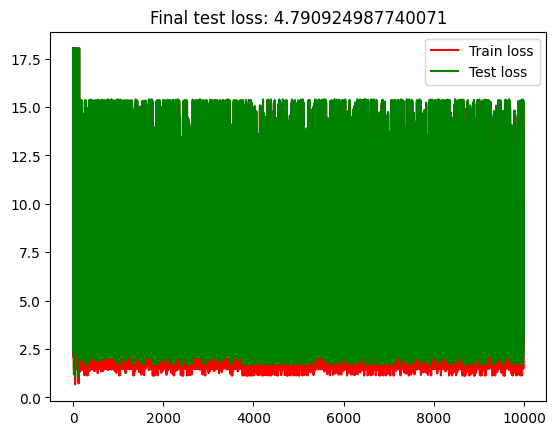

In [132]:
train_grad_desc(X_tr, y_tr, X_te, y_te, 
                    learning_rate=1.0, n_hidden_neurons=5, num_epochs=10000);

## Stochastic Gradient Descent (SGD) algorithm

$$LOSS(w) = \sum_{num_{samples}} L_i(w)$$

- Shuffle the samples randomly
- iterate through the sum loop by batches and update $w$ after every single batch

In [8]:
## Stochastic gradient descent algorithm with mini-batches

def train_sgd(X_tr, y_tr, X_te, y_te, learning_rate=0.001, 
              n_hidden_neurons=5, n_epochs=100, batch_size=32, random_state=42):

    return train_losses, test_losses, W1, W2

## Plot the decision boundary during the optimization process

(3, 5) (6, 1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1826.98it/s]


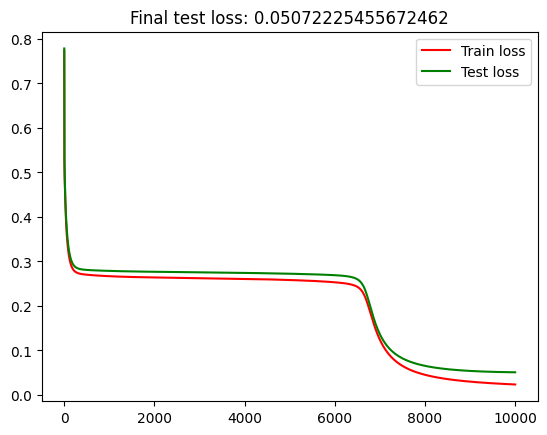

In [136]:
_, _, W1, W2 = train_grad_desc(X_tr, y_tr, X_te, y_te, 
                               learning_rate=0.001, n_hidden_neurons=5, num_epochs=10000);

((100, 100), (100, 100))

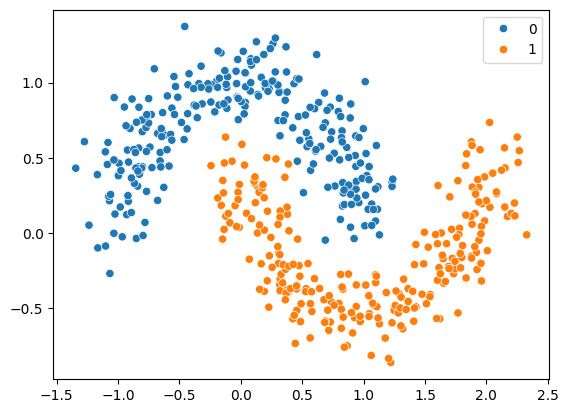

In [147]:
m1 = np.linspace(-3, 3, 100)
m2 = np.linspace(-1, 2, 100)
xx1, xx2 = np.meshgrid(m1, m2)

def grad_desc_nn_plot(X_tr, y_tr, learning_rate, num_epochs, n_hidden_neurons=5, plot_step=10, random_state=42):

    num_features = X_tr.shape[1]

    rs = np.random.RandomState(random_state)
    
    W1 = rs.normal(size=(num_features + 1, n_hidden_neurons))
    W2 = rs.normal(size=(n_hidden_neurons + 1, 1))

    for idx in tqdm(range(num_epochs)):
        
        gradient1, gradient2 = backprop(X_tr, W1, W2, y_tr)
        
        W1 = W1 - learning_rate * gradient1
        W2 = W2 - learning_rate * gradient2

        if idx % plot_step == 0:
            
            X = np.hstack((xx1.reshape(-1, 1), xx2.reshape(-1, 1)))

            predictions_grid = feedforward(X, W1, W2)
            
            plt.contourf(xx1, xx2, predictions_grid.reshape(100, 100), levels=[0, 0.5, 1], cmap="hsv")
            plt.colorbar()
            
            sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr)
            plt.show()
    
    return 

sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr)

xx1.shape, xx2.shape

((10000, 2), (10000, 1))

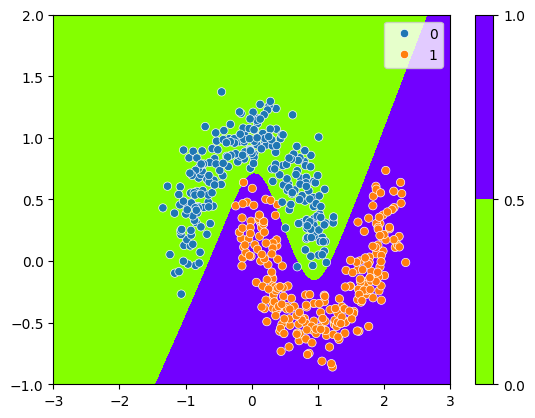

In [148]:
X = np.hstack((xx1.reshape(-1, 1), xx2.reshape(-1, 1)))

predictions_grid = feedforward(X, W1, W2)

plt.contourf(xx1, xx2, predictions_grid.reshape(100, 100), levels=[0, 0.5, 1], cmap="hsv")
plt.colorbar()

sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y_tr)

X.shape, predictions_grid.shape



  0%|                                                                                                                                                                                                                                                   | 0/500 [00:00<?, ?it/s]

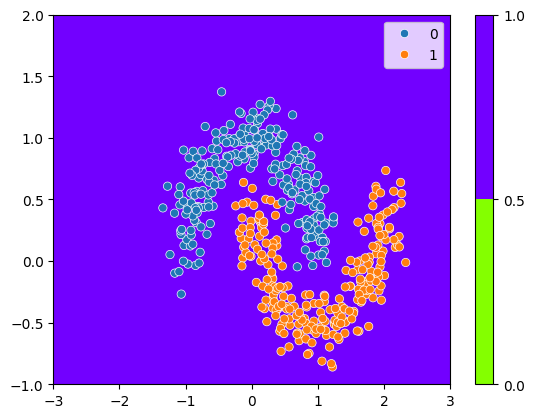

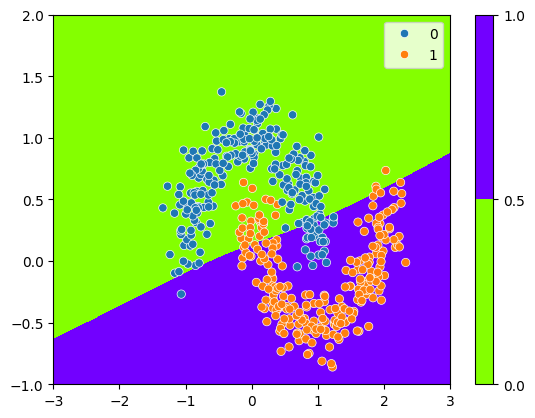

 10%|███████████████████████▊                                                                                                                                                                                                                 | 51/500 [00:00<00:01, 322.77it/s]

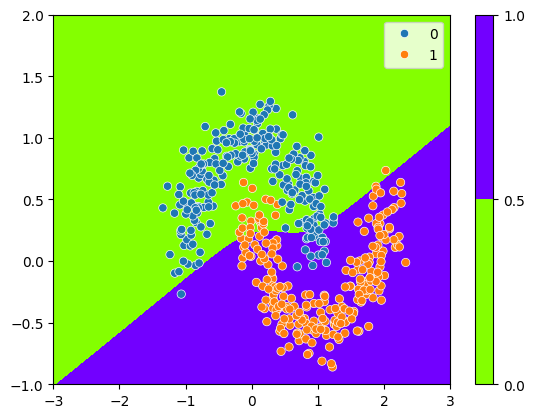

 20%|██████████████████████████████████████████████▊                                                                                                                                                                                         | 101/500 [00:00<00:01, 398.79it/s]

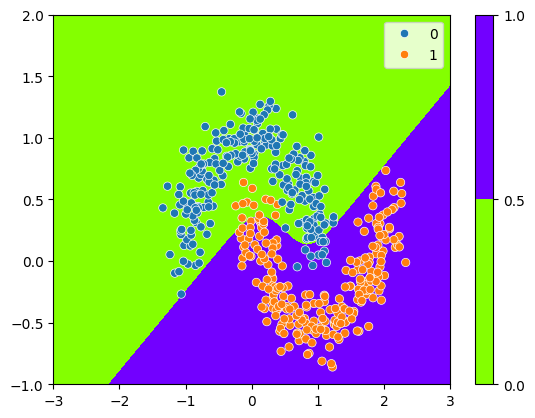

 33%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                          | 167/500 [00:00<00:00, 503.03it/s]

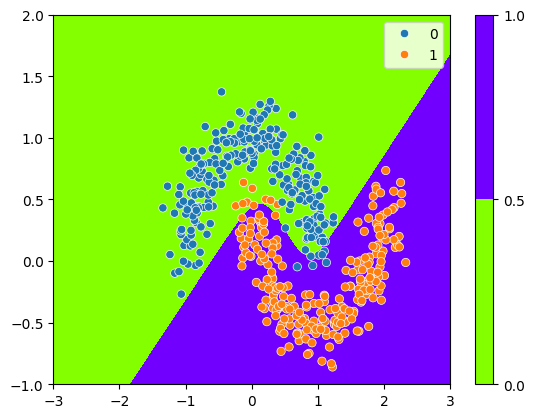

 44%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                  | 220/500 [00:00<00:00, 301.67it/s]

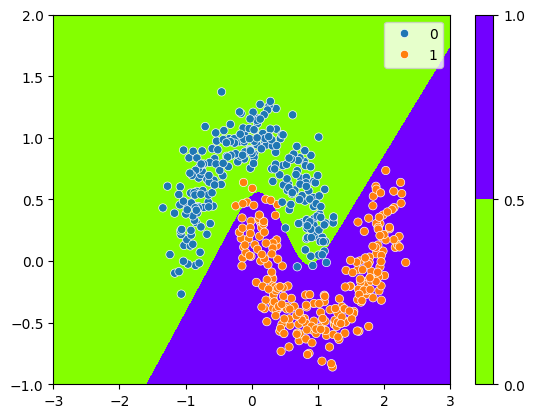

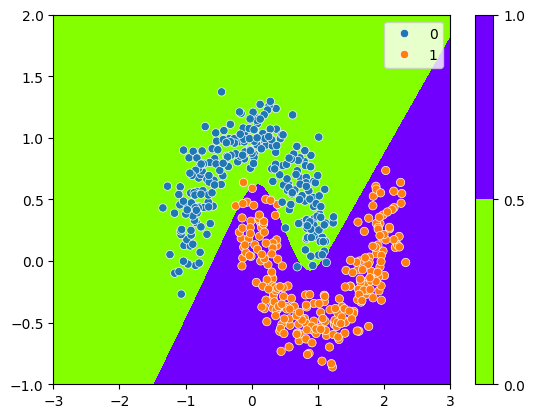

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 301/500 [00:00<00:00, 359.22it/s]

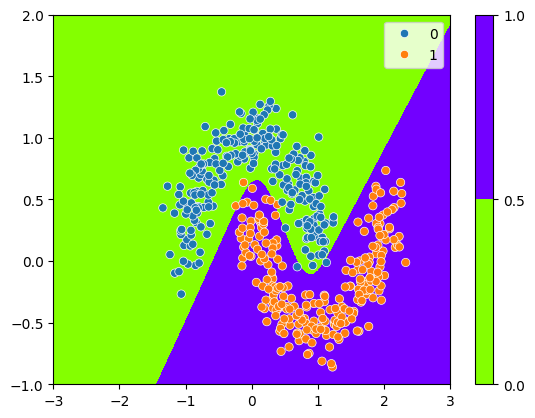

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 351/500 [00:00<00:00, 364.58it/s]

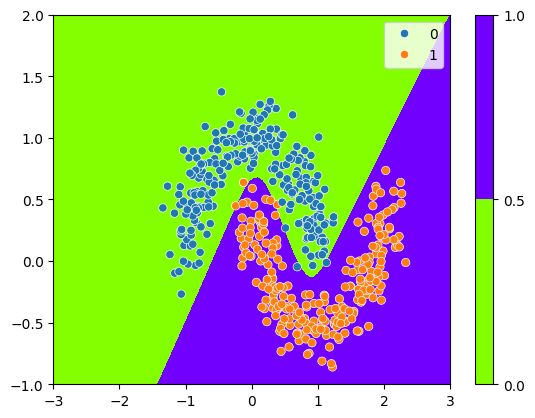

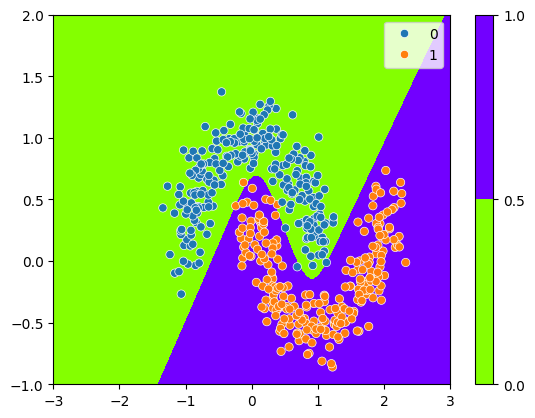

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 441.96it/s]


In [149]:
X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)

grad_desc_nn_plot(X_tr, y_tr, learning_rate=0.01, num_epochs=500, n_hidden_neurons=5, plot_step=50, random_state=42)

  0%|                                                                                                                                                                                                                                                   | 0/500 [00:00<?, ?it/s]

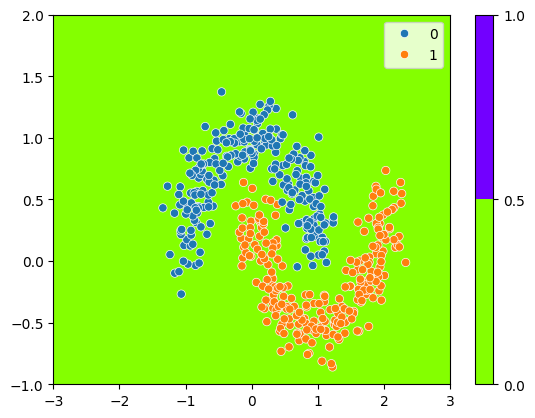

  0%|▍                                                                                                                                                                                                                                          | 1/500 [00:00<00:57,  8.60it/s]

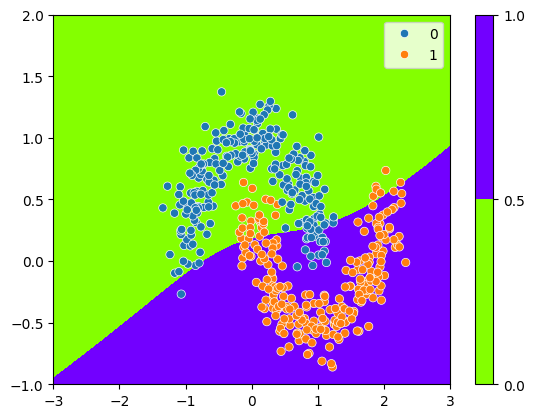

 17%|███████████████████████████████████████▌                                                                                                                                                                                                 | 85/500 [00:00<00:01, 264.89it/s]

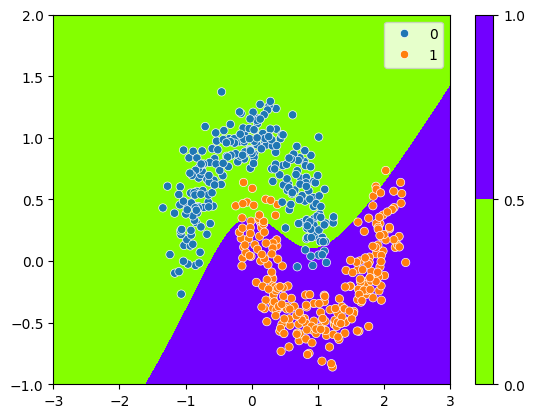

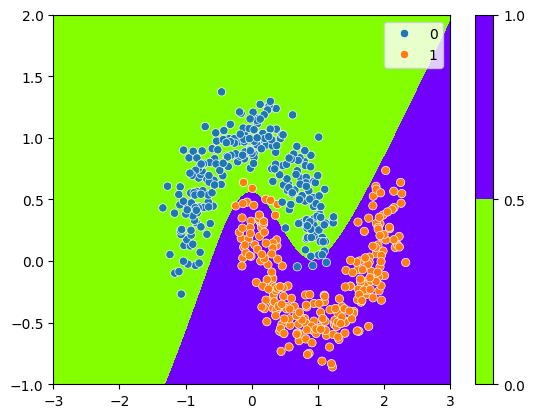

 30%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 151/500 [00:00<00:01, 307.99it/s]

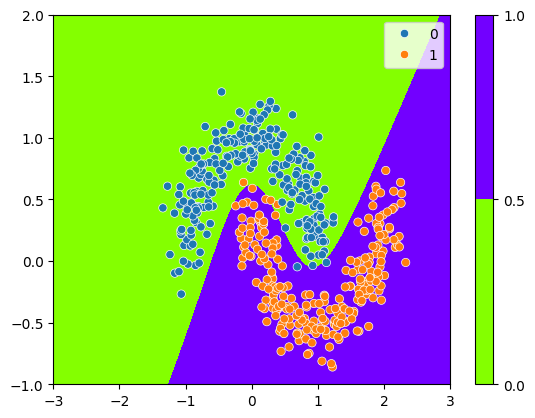

 40%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                          | 201/500 [00:00<00:00, 328.28it/s]

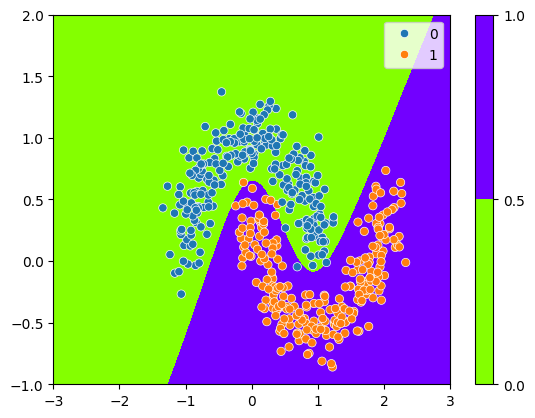

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 251/500 [00:00<00:00, 346.66it/s]

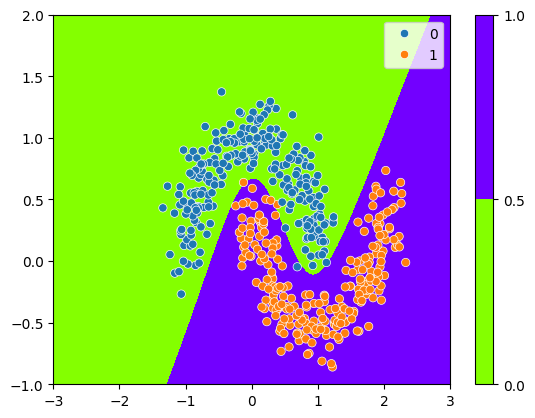

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 301/500 [00:00<00:00, 338.51it/s]

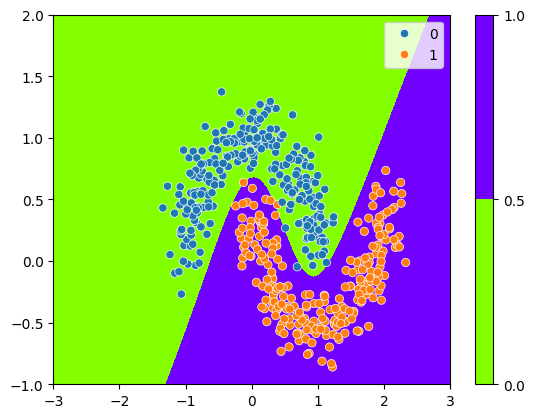

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 351/500 [00:01<00:00, 366.58it/s]

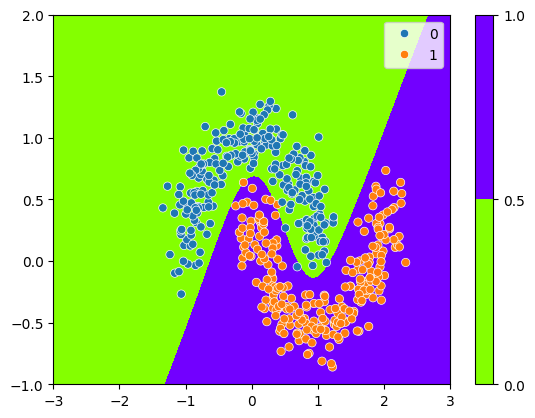

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 401/500 [00:01<00:00, 389.89it/s]

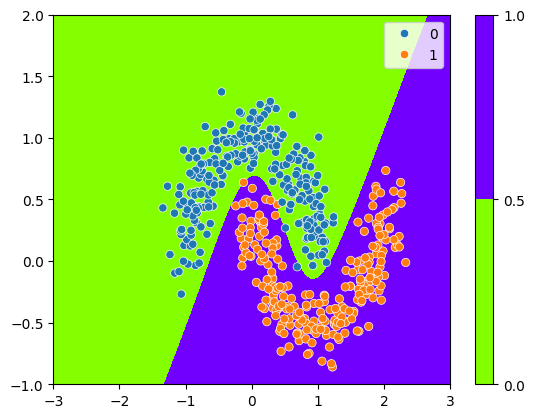

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 367.71it/s]


In [150]:
X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)

grad_desc_nn_plot(X_tr, y_tr, learning_rate=0.01, num_epochs=500, n_hidden_neurons=50, plot_step=50, random_state=42)

  0%|                                                                                                                                                                                                                                                   | 0/500 [00:00<?, ?it/s]

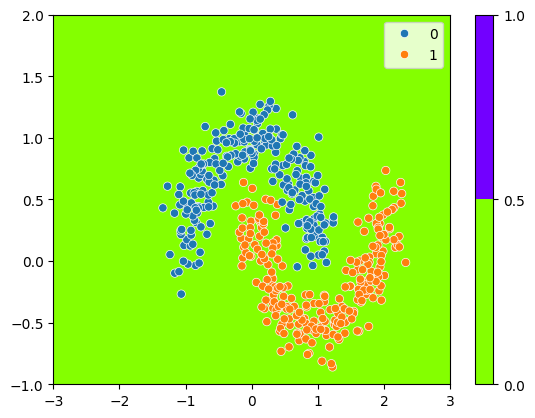

  7%|███████████████▍                                                                                                                                                                                                                         | 33/500 [00:00<00:02, 156.51it/s]

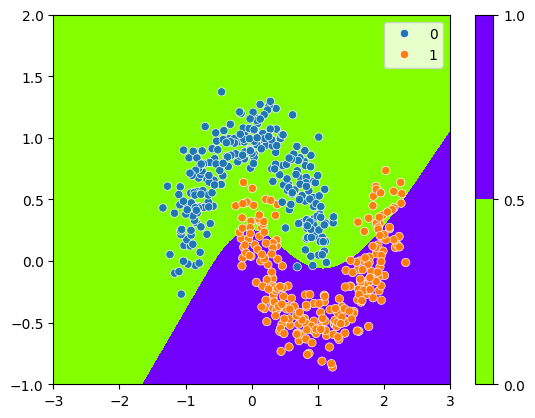

 17%|███████████████████████████████████████▌                                                                                                                                                                                                 | 85/500 [00:00<00:02, 190.47it/s]

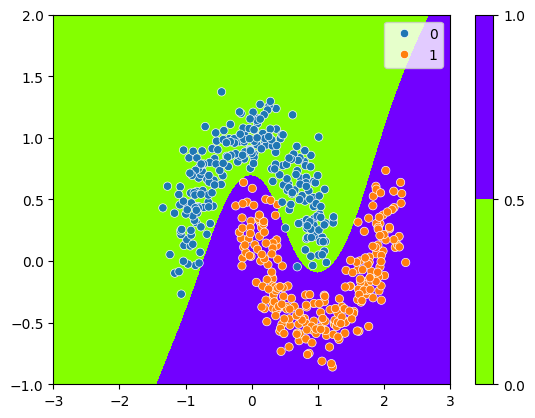

 29%|██████████████████████████████████████████████████████████████████▊                                                                                                                                                                     | 144/500 [00:00<00:01, 189.28it/s]

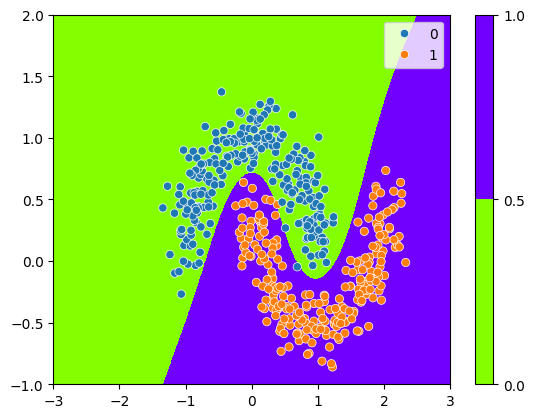

 34%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                          | 168/500 [00:01<00:02, 163.14it/s]

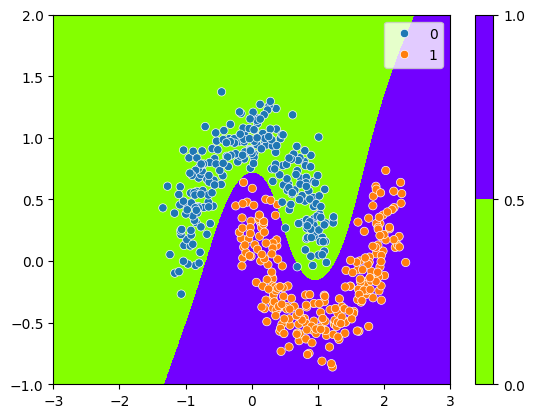

 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                               | 226/500 [00:01<00:01, 179.23it/s]

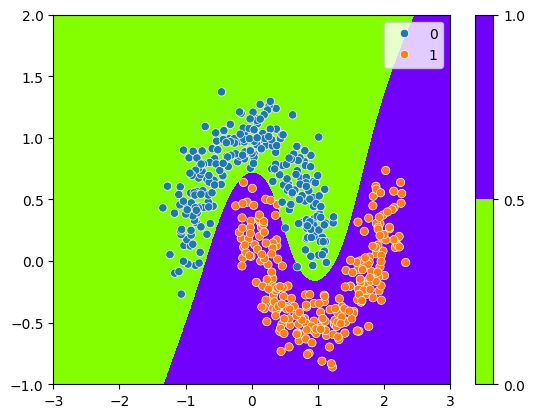

 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 278/500 [00:01<00:01, 186.16it/s]

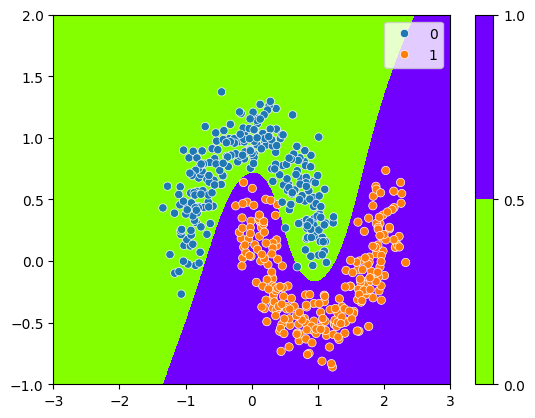

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 334/500 [00:01<00:00, 202.28it/s]

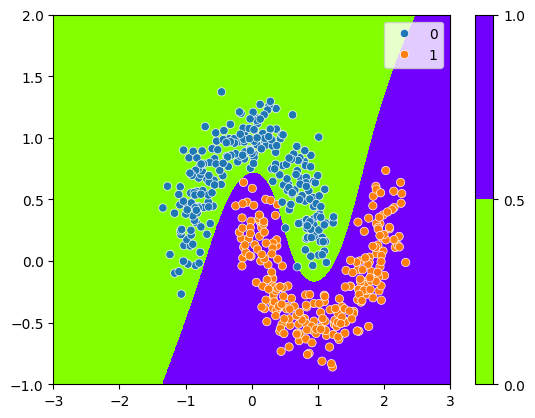

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 389/500 [00:02<00:00, 200.78it/s]

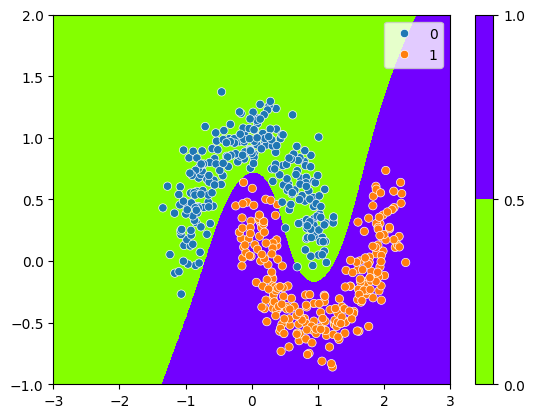

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 433/500 [00:02<00:00, 164.69it/s]

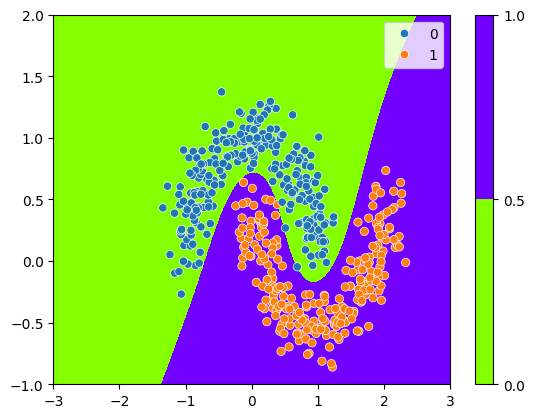

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 170.86it/s]


In [151]:
X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)

grad_desc_nn_plot(X_tr, y_tr, learning_rate=0.01, num_epochs=500, n_hidden_neurons=500, plot_step=50, random_state=42)

  0%|                                                                                                                                                                                                                                                   | 0/500 [00:00<?, ?it/s]

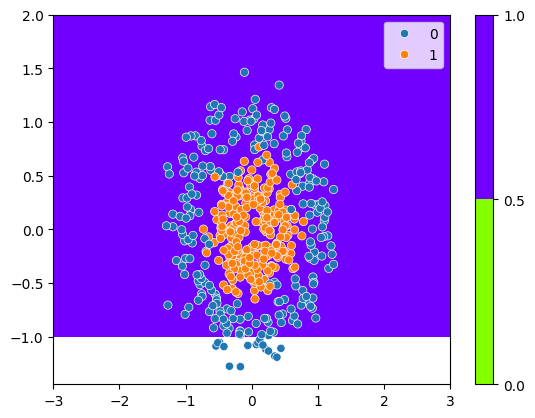

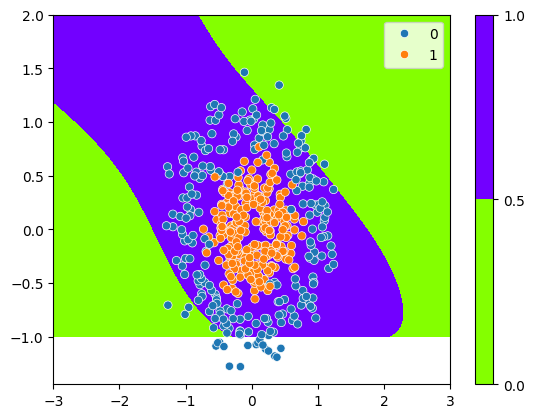

 10%|███████████████████████▊                                                                                                                                                                                                                 | 51/500 [00:00<00:01, 252.61it/s]

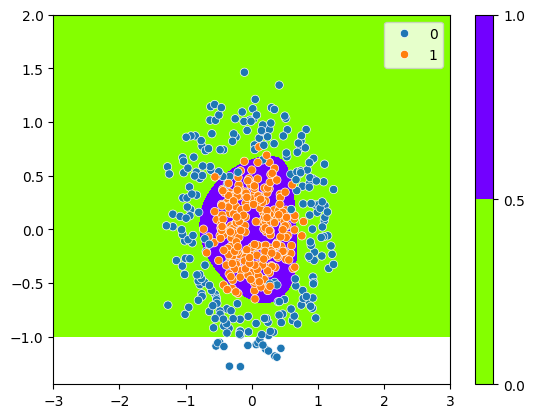

 26%|████████████████████████████████████████████████████████████▊                                                                                                                                                                           | 131/500 [00:00<00:00, 479.34it/s]

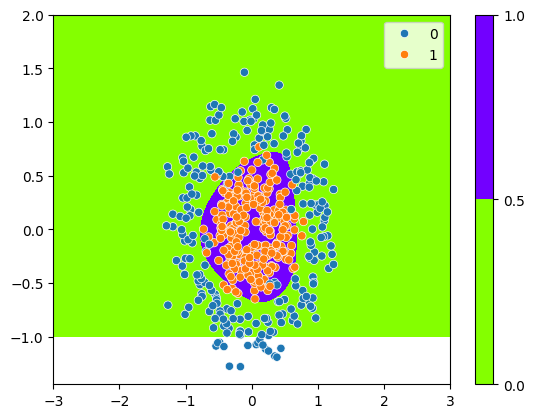

 38%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 189/500 [00:00<00:00, 478.41it/s]

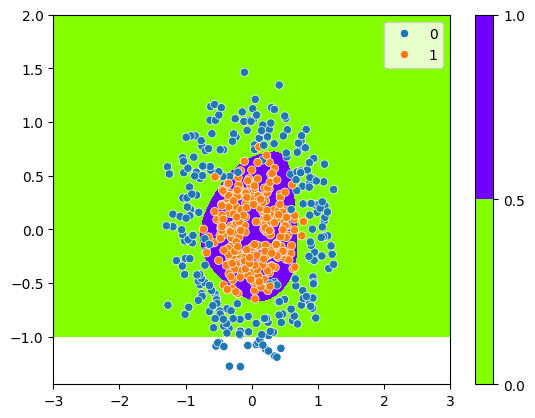

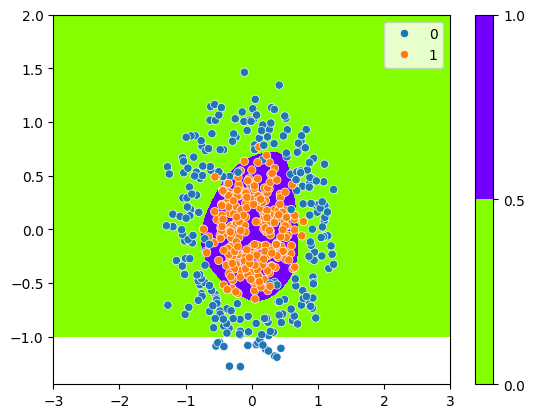

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 251/500 [00:00<00:00, 435.88it/s]

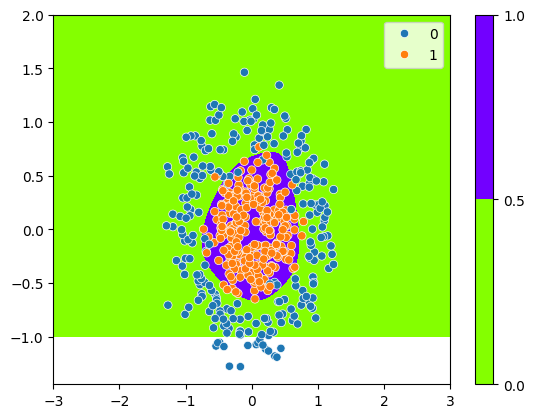

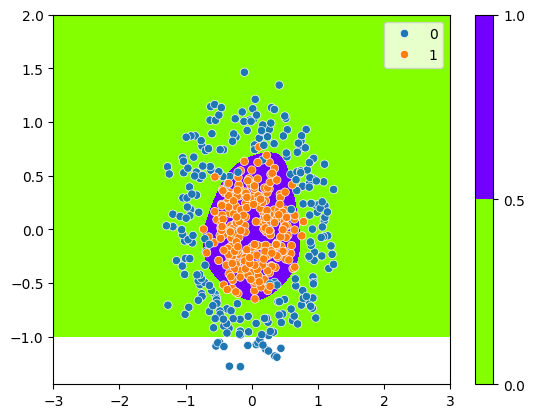

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 351/500 [00:00<00:00, 448.09it/s]

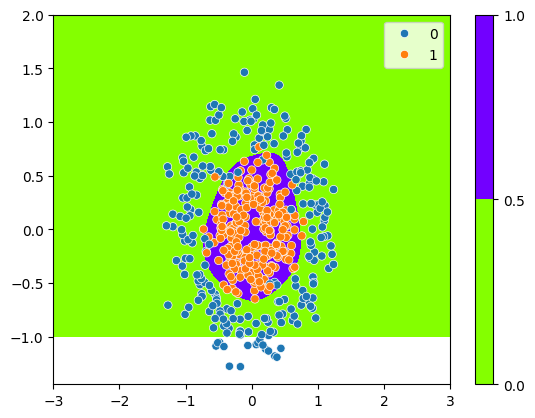

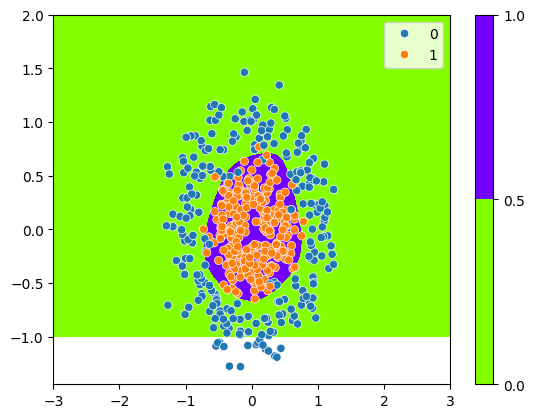

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 409.05it/s]


In [153]:
from sklearn.datasets import make_circles


X_tr, y_tr = make_circles(500, random_state=42, noise=0.15, factor=0.4)

grad_desc_nn_plot(X_tr, y_tr, learning_rate=0.01, num_epochs=500, n_hidden_neurons=5, plot_step=50, random_state=42)

### Avoiding overfitting - Regularization

We can use the standard way to penalize the non-zero weights by applying $L2$ or $L1$ regularization terms 

### Another technique to avoid overfitting - Dropout

During every update we temporarily randomly delete a number (typically a fixed percentage) of neurons (all their connections are set to 0 weights) and force the reamining ones to learn more distinctive features. When we evaluate the model everything is turned on again.

### Stopping criterion in SGD

Since the loss functions are noisy during an SGD training it might be difficult to find a good stopping point
- either we can set the number of epochs to fixed number or
- for example if the test_loss/validation_loss hasn't been improved in the last $k$ epochs we can stop

### Learning rate change

We can adaptively change the learning rate
- initially is worth using a higher learning rate
- then as we are getting closer and closer to a plateau, we can gradually decrease it

### Weight initialization

If we work with sigmoid activations and lots of neurons, it is better to keep the $z$ values close to $0$ to avoid the vanishing gradient phenomenon, i.e. $\sigma'(z)\approx 0$ if $z$ is large; thus the initial weights need to be chosen more carefully, but this is not so important for small networks

- for example, use a uniform distribution from the interval $\left[-\frac{1}{\sqrt{n}}; \frac{1}{\sqrt{n}}\right]$

### Data augmentation

If we can easily get more samples, it's definitely worth doing it. Quite often even a model with a weak potential can outperform a good model if it is trained on a much larger dataset. For certain tasks it is cheap to artificially generate new data points
- for images we can distort them by
  - shifting
  - rotations
  - reflections (be careful, the digits 6 and 9 should be different)
  - adding random noise
- similar tricks can be applied in other cases, too (sometimes even for textual data - translate to another language and back, use synonyms, etc.)  

## Keras and Tensorflow implementations

Now that we have some basic knowledge about the neural networks, we are allowed to use the Tensorflow implementations via the Keras API.

First we get to know the Keras Sequential API with which we can build our Neural Network architecture sequentially for the MNIST dataset. The more flexible Functional API will be investigated later.

- We start with an input layer that accepts $28 \times 28$ inputs (MNIST), (2,) for `moons`
- The apply a dense layer
- Apply an activation function
- A dense layer again
- And a sigmoid activation to predict probabilities

In [161]:
#!pip install keras
#!pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.optimizers import SGD

model = Sequential()

model.add(Input(shape=[2]))
model.add(Dense(5))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

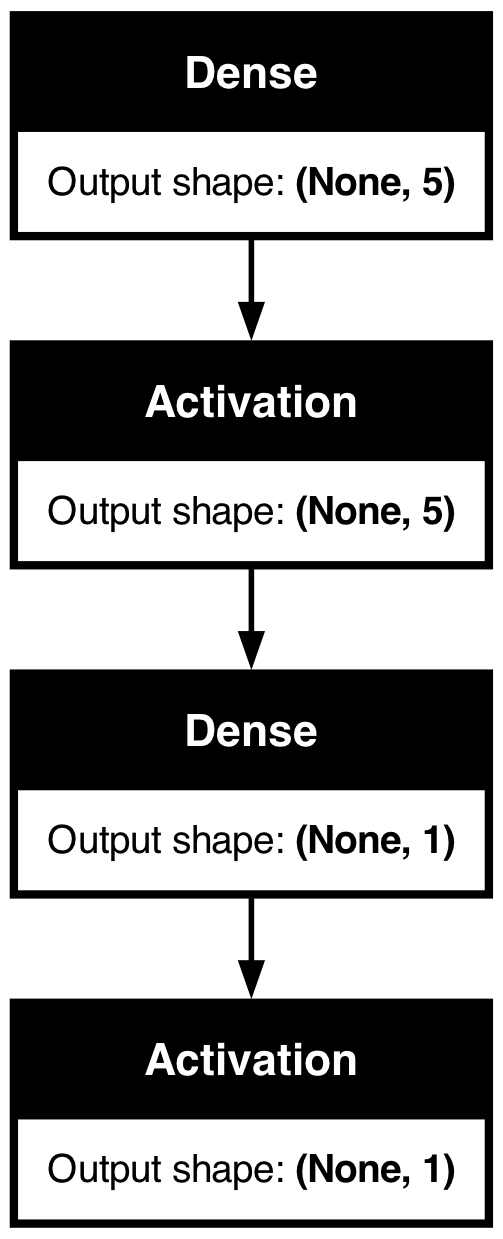

In [162]:
from keras.utils import plot_model
# pip install pydot

plot_model(model, show_shapes=True)

The model has to be compiled, where we can specify
- the loss function
- the additional metrics to monitor
- the optimizer

In [163]:
model.compile(loss="binary_crossentropy", 
              metrics=["accuracy"],
              optimizer=SGD(learning_rate=0.1))

We have to fit the model where we can specify 

- a train set with labels
- batch size
- number of epochs
- ratio for the validation set that can used for hyperparameter selection

In [164]:
X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)

model.fit(X_tr, y_tr, 
          batch_size=32, 
          epochs=20, 
          validation_split=0.1 # 10% of the train set is used for validation
         )

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7183 - loss: 0.6530 - val_accuracy: 0.8200 - val_loss: 0.6337
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.6319 - val_accuracy: 0.8200 - val_loss: 0.6173
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8401 - loss: 0.6171 - val_accuracy: 0.8200 - val_loss: 0.6020
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8246 - loss: 0.5984 - val_accuracy: 0.8600 - val_loss: 0.5830
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8242 - loss: 0.5828 - val_accuracy: 0.8200 - val_loss: 0.5646
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8091 - loss: 0.5720 - val_accuracy: 0.8200 - val_loss: 0.5462
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8291 - loss: 0.5490 - val_accuracy: 0.8600 - val_loss: 0.5261
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8250 - loss: 0.5329 - val_accuracy: 0.8600 - val_loss

In [166]:
model = Sequential()

model.add(Input(shape=[2]))
model.add(Dense(5))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", 
              metrics=["accuracy"],
              optimizer=SGD(learning_rate=10.0))

X_tr, y_tr = make_moons(500, random_state=42, noise=0.15)

model.fit(X_tr, y_tr, 
          batch_size=32, 
          epochs=20, 
          validation_split=0.1 # 10% of the train set is used for validation
         )

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6598 - loss: 0.8512 - val_accuracy: 0.8000 - val_loss: 0.4855
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8324 - loss: 0.3199 - val_accuracy: 0.5000 - val_loss: 1.1705
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7956 - loss: 0.4275 - val_accuracy: 0.8000 - val_loss: 0.3128
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.2777 - val_accuracy: 0.8000 - val_loss: 0.3825
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.3486 - val_accuracy: 0.7600 - val_loss: 0.7225
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8573 - loss: 0.3032 - val_accuracy: 0.9000 - val_loss: 0.2358
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8702 - loss: 0.2273 - val_accuracy: 0.8400 - val_loss: 0.2860
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8860 - loss: 0.2280 - val_accuracy: 0.6000 - val_loss

In [167]:
# evaluate the model on the test set

X_te, y_te = make_moons(100, random_state=43, noise=0.15)

model.evaluate(X_te, y_te)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9939 - loss: 0.0295


[0.03080172836780548, 0.9900000095367432]

In [168]:
model.predict(X_te)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[1.3072454e-04],
       [2.8462892e-02],
       [7.5999310e-04],
       [7.4960364e-05],
       [9.8537910e-01],
       [9.6876490e-01],
       [9.9320567e-01],
       [9.8655671e-01],
       [4.6431790e-03],
       [9.9513489e-01],
       [1.8567272e-02],
       [1.5412316e-03],
       [9.8724538e-01],
       [9.3619682e-02],
       [9.8954928e-01],
       [1.4102577e-02],
       [5.7085536e-02],
       [1.2548132e-01],
       [9.7103566e-01],
       [9.7994882e-01],
       [3.2459404e-03],
       [7.2940472e-03],
       [9.8750025e-01],
       [9.8961580e-01],
       [8.7525448e-05],
       [9.8580152e-01],
       [8.4719038e-01],
       [9.3492633e-01],
       [9.8898518e-01],
       [3.2219572e-03],
       [1.9855563e-02],
       [7.8977982e-04],
       [4.1560400e-03],
       [1.0135894e-04],
       [5.6317467e-03],
       [9.8577988e-01],
       [9.9938297e-01],
       [5.9701438e-04],
       [1.8626534e-04],
       [2.4085311e-02],
       [9.8890185e-01],
       [2.538397